ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ ПЛОТНОСТИ ОТ ПАРАМЕТРОВ НСВ

1. РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ (Uniform)
Плотность: f(x) = 1/(b-a) для x ∈ [a, b], иначе 0
Мат. ожидание: E[X] = (a+b)/2
Дисперсия: Var[X] = (b-a)²/12

2. ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (Exponential)
Плотность: f(x) = λ·exp(-λx) для x ≥ 0
Мат. ожидание: E[X] = 1/λ
Дисперсия: Var[X] = 1/λ²


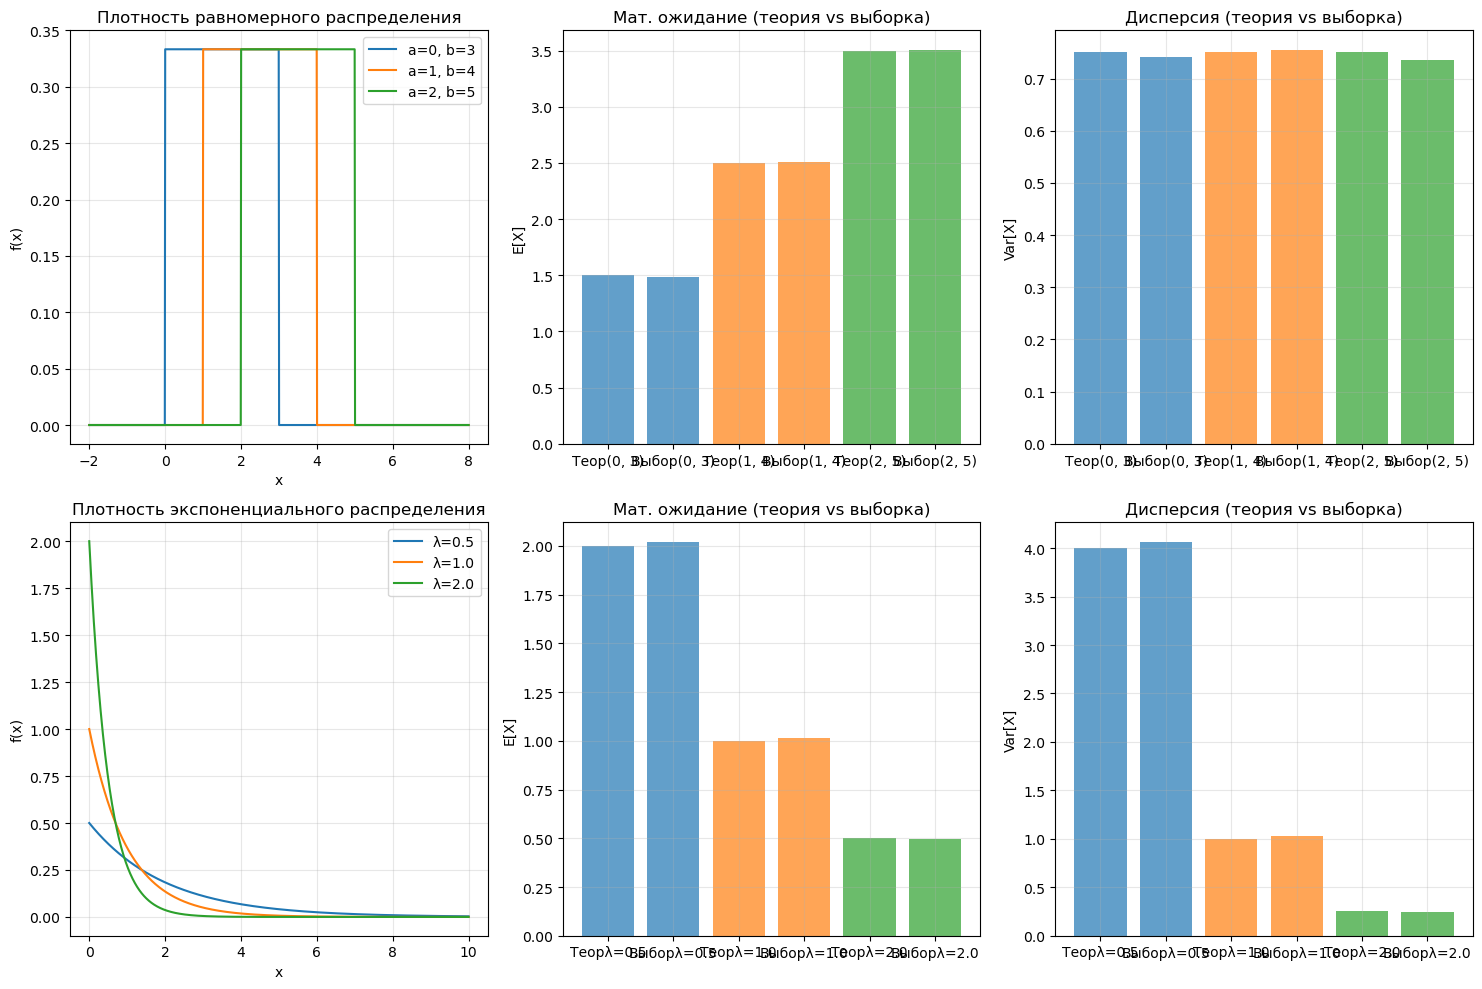


3. НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (Normal/Gaussian)
Плотность: f(x) = 1/(σ√(2π))·exp(-(x-μ)²/(2σ²))
Мат. ожидание: E[X] = μ
Дисперсия: Var[X] = σ²

4. ЛОГНОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (Log-Normal)
Если Y ~ N(μ, σ²), то X = exp(Y) ~ LogN(μ, σ²)
Плотность: f(x) = 1/(xσ√(2π))·exp(-(ln x - μ)²/(2σ²)), x > 0
Мат. ожидание: E[X] = exp(μ + σ²/2)
Дисперсия: Var[X] = [exp(σ²) - 1]·exp(2μ + σ²)


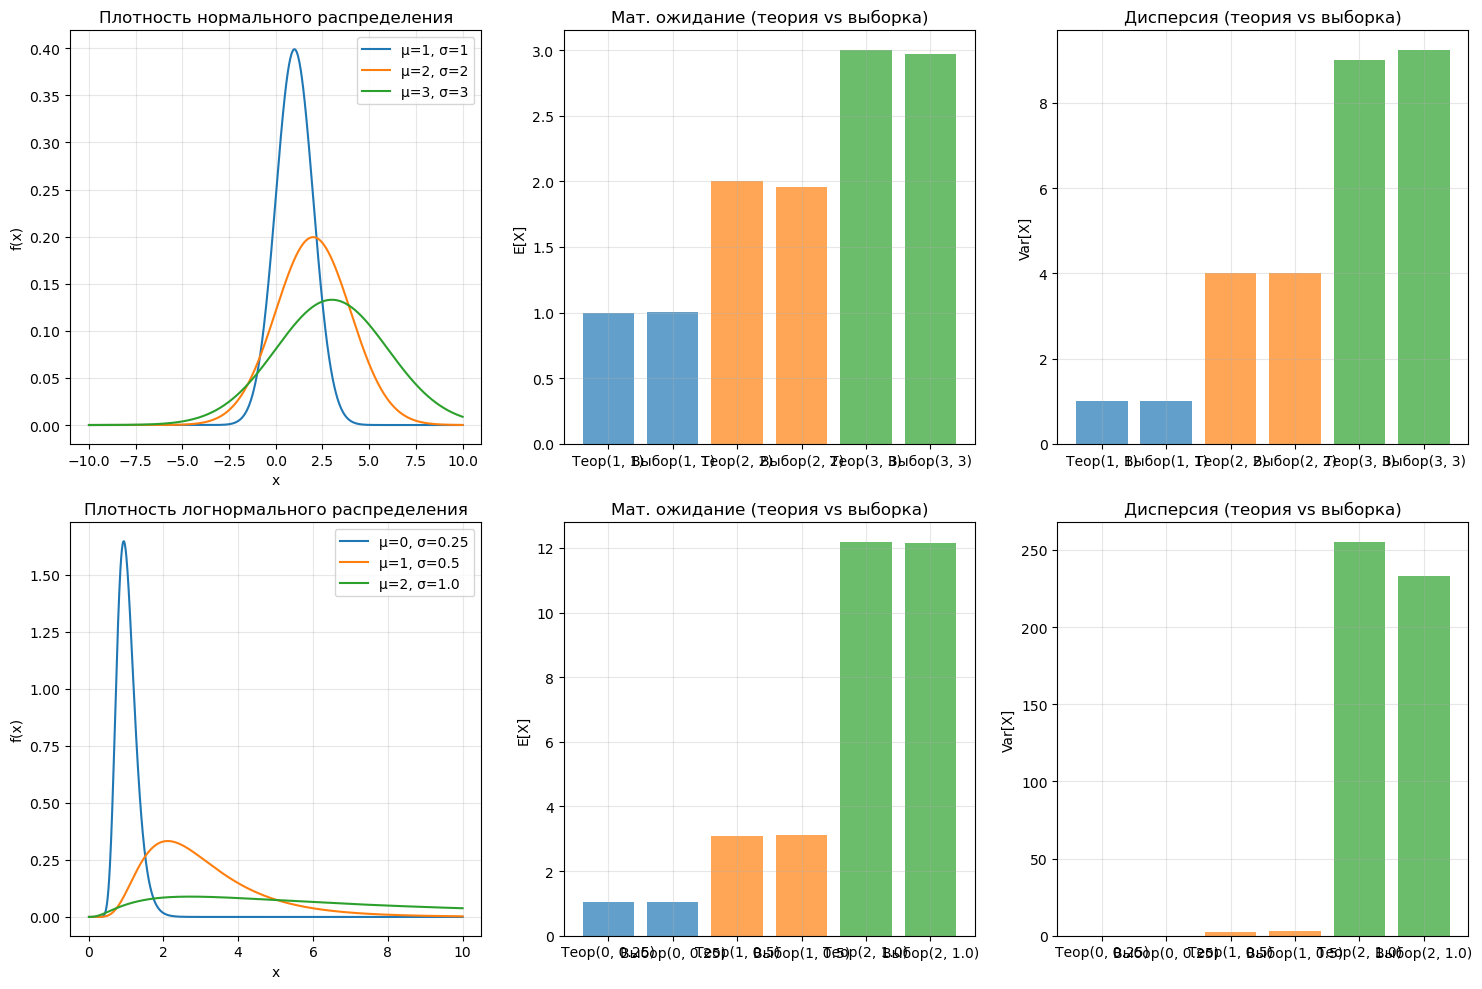


СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОЧНОСТИ ФОРМУЛ

Uniform:
  Теория: E[X]=2.0000, Var[X]=1.3333
  Выборка: E[X]=1.9830, Var[X]=1.3349
  Ошибка: мат.ожид.=0.85%, дисперсия=0.12%

Exponential:
  Теория: E[X]=0.5000, Var[X]=0.2500
  Выборка: E[X]=0.5028, Var[X]=0.2588
  Ошибка: мат.ожид.=0.55%, дисперсия=3.51%

Normal:
  Теория: E[X]=1.0000, Var[X]=4.0000
  Выборка: E[X]=0.9760, Var[X]=3.9284
  Ошибка: мат.ожид.=2.40%, дисперсия=1.79%

LogNormal:
  Теория: E[X]=1.1331, Var[X]=0.3647
  Выборка: E[X]=1.1251, Var[X]=0.3581
  Ошибка: мат.ожид.=0.71%, дисперсия=1.81%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

print("=" * 70)
print("ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ ПЛОТНОСТИ ОТ ПАРАМЕТРОВ НСВ")
print("=" * 70)

print("\n1. РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ (Uniform)")
print("Плотность: f(x) = 1/(b-a) для x ∈ [a, b], иначе 0")
print("Мат. ожидание: E[X] = (a+b)/2")
print("Дисперсия: Var[X] = (b-a)²/12")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
x_uniform = np.linspace(-2, 8, 1000)

a_vals = [0, 1, 2]
b_vals = [3, 4, 5]

for i in range(3):
    a, b = a_vals[i], b_vals[i]
    pdf = stats.uniform.pdf(x_uniform, loc=a, scale=b-a)
    axes[0, 0].plot(x_uniform, pdf, label=f'a={a}, b={b}')
    
    sample = stats.uniform.rvs(loc=a, scale=b-a, size=10000)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=0)
    theory_mean = (a+b)/2
    theory_var = (b-a)**2/12
    
    axes[0, 1].bar([f'Теор{a,b}', f'Выбор{a,b}'], [theory_mean, sample_mean], alpha=0.7)
    axes[0, 2].bar([f'Теор{a,b}', f'Выбор{a,b}'], [theory_var, sample_var], alpha=0.7)

axes[0, 0].set_title('Плотность равномерного распределения')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_title('Мат. ожидание (теория vs выборка)')
axes[0, 1].set_ylabel('E[X]')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].set_title('Дисперсия (теория vs выборка)')
axes[0, 2].set_ylabel('Var[X]')
axes[0, 2].grid(True, alpha=0.3)

print("\n2. ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (Exponential)")
print("Плотность: f(x) = λ·exp(-λx) для x ≥ 0")
print("Мат. ожидание: E[X] = 1/λ")
print("Дисперсия: Var[X] = 1/λ²")

x_exp = np.linspace(0, 10, 1000)
lambda_vals = [0.5, 1.0, 2.0]

for i, lam in enumerate(lambda_vals):
    pdf = stats.expon.pdf(x_exp, scale=1/lam)
    axes[1, 0].plot(x_exp, pdf, label=f'λ={lam}')
    
    sample = stats.expon.rvs(scale=1/lam, size=10000)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=0)
    theory_mean = 1/lam
    theory_var = 1/lam**2
    
    axes[1, 1].bar([f'Теорλ={lam}', f'Выборλ={lam}'], [theory_mean, sample_mean], alpha=0.7)
    axes[1, 2].bar([f'Теорλ={lam}', f'Выборλ={lam}'], [theory_var, sample_var], alpha=0.7)

axes[1, 0].set_title('Плотность экспоненциального распределения')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_title('Мат. ожидание (теория vs выборка)')
axes[1, 1].set_ylabel('E[X]')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].set_title('Дисперсия (теория vs выборка)')
axes[1, 2].set_ylabel('Var[X]')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n3. НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (Normal/Gaussian)")
print("Плотность: f(x) = 1/(σ√(2π))·exp(-(x-μ)²/(2σ²))")
print("Мат. ожидание: E[X] = μ")
print("Дисперсия: Var[X] = σ²")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
x_norm = np.linspace(-10, 10, 1000)

mu_vals = [1, 2, 3]
sigma_vals = [1, 2, 3]

for i in range(3):
    mu, sigma = mu_vals[i], sigma_vals[i]
    pdf = stats.norm.pdf(x_norm, loc=mu, scale=sigma)
    axes[0, 0].plot(x_norm, pdf, label=f'μ={mu}, σ={sigma}')
    
    sample = stats.norm.rvs(loc=mu, scale=sigma, size=10000)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=0)
    theory_mean = mu
    theory_var = sigma**2
    
    axes[0, 1].bar([f'Теор{mu,sigma}', f'Выбор{mu,sigma}'], [theory_mean, sample_mean], alpha=0.7)
    axes[0, 2].bar([f'Теор{mu,sigma}', f'Выбор{mu,sigma}'], [theory_var, sample_var], alpha=0.7)

axes[0, 0].set_title('Плотность нормального распределения')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_title('Мат. ожидание (теория vs выборка)')
axes[0, 1].set_ylabel('E[X]')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].set_title('Дисперсия (теория vs выборка)')
axes[0, 2].set_ylabel('Var[X]')
axes[0, 2].grid(True, alpha=0.3)

print("\n4. ЛОГНОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ (Log-Normal)")
print("Если Y ~ N(μ, σ²), то X = exp(Y) ~ LogN(μ, σ²)")
print("Плотность: f(x) = 1/(xσ√(2π))·exp(-(ln x - μ)²/(2σ²)), x > 0")
print("Мат. ожидание: E[X] = exp(μ + σ²/2)")
print("Дисперсия: Var[X] = [exp(σ²) - 1]·exp(2μ + σ²)")

x_lognorm = np.linspace(0.01, 10, 1000)
mu_lognorm_vals = [0, 1, 2]
sigma_lognorm_vals = [0.25, 0.5, 1.0]

for i in range(3):
    mu, sigma = mu_lognorm_vals[i], sigma_lognorm_vals[i]
    pdf = stats.lognorm.pdf(x_lognorm, s=sigma, scale=np.exp(mu))
    axes[1, 0].plot(x_lognorm, pdf, label=f'μ={mu}, σ={sigma}')
    
    sample = stats.lognorm.rvs(s=sigma, scale=np.exp(mu), size=10000)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=0)
    theory_mean = np.exp(mu + sigma**2/2)
    theory_var = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    
    axes[1, 1].bar([f'Теор{mu,sigma}', f'Выбор{mu,sigma}'], [theory_mean, sample_mean], alpha=0.7)
    axes[1, 2].bar([f'Теор{mu,sigma}', f'Выбор{mu,sigma}'], [theory_var, sample_var], alpha=0.7)

axes[1, 0].set_title('Плотность логнормального распределения')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_title('Мат. ожидание (теория vs выборка)')
axes[1, 1].set_ylabel('E[X]')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].set_title('Дисперсия (теория vs выборка)')
axes[1, 2].set_ylabel('Var[X]')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОЧНОСТИ ФОРМУЛ")
print("=" * 70)

distributions = {
    'Uniform': {'a': 0, 'b': 4},
    'Exponential': {'lambda': 2.0},
    'Normal': {'mu': 1, 'sigma': 2},
    'LogNormal': {'mu': 0, 'sigma': 0.5}
}

for name, params in distributions.items():
    if name == 'Uniform':
        a, b = params['a'], params['b']
        sample = stats.uniform.rvs(loc=a, scale=b-a, size=10000)
        theory_mean = (a+b)/2
        theory_var = (b-a)**2/12
    elif name == 'Exponential':
        lam = params['lambda']
        sample = stats.expon.rvs(scale=1/lam, size=10000)
        theory_mean = 1/lam
        theory_var = 1/lam**2
    elif name == 'Normal':
        mu, sigma = params['mu'], params['sigma']
        sample = stats.norm.rvs(loc=mu, scale=sigma, size=10000)
        theory_mean = mu
        theory_var = sigma**2
    elif name == 'LogNormal':
        mu, sigma = params['mu'], params['sigma']
        sample = stats.lognorm.rvs(s=sigma, scale=np.exp(mu), size=10000)
        theory_mean = np.exp(mu + sigma**2/2)
        theory_var = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=0)
    
    mean_error = abs((sample_mean - theory_mean) / theory_mean) * 100
    var_error = abs((sample_var - theory_var) / theory_var) * 100
    
    print(f"\n{name}:")
    print(f"  Теория: E[X]={theory_mean:.4f}, Var[X]={theory_var:.4f}")
    print(f"  Выборка: E[X]={sample_mean:.4f}, Var[X]={sample_var:.4f}")
    print(f"  Ошибка: мат.ожид.={mean_error:.2f}%, дисперсия={var_error:.2f}%")
